In [1]:
import json
import sys
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
from scripts.utils.grounded_sam_utils import GroundedDinoAnnotations

sys.path.append('/net/trapnell/vol1/home/mdcolon/proj/morphseq/segmentation_sandbox')

# Path to finetuned annotation file
ann_path = '/net/trapnell/vol1/home/mdcolon/proj/morphseq/segmentation_sandbox/data/annotation_and_masks/gdino_annotations/gdino_annotations_finetuned.json'

# Load annotation manager
gdino_ann = GroundedDinoAnnotations(ann_path, verbose=False)

# Get all image IDs
image_ids = gdino_ann.get_all_image_ids()
print(f'Total annotated images: {len(image_ids)}')

# Generate high-quality annotations with default threshold (0.5)
hq_default = gdino_ann.get_or_generate_high_quality_annotations(image_ids, prompt='individual embryo', confidence_threshold=0.5, iou_threshold=0.5, save_to_self=False)

# Generate high-quality annotations with threshold 0.4
hq_04 = gdino_ann.get_or_generate_high_quality_annotations(image_ids, prompt='individual embryo', confidence_threshold=0.4, iou_threshold=0.5, save_to_self=False)


Total annotated images: 149523


AttributeError: 'list' object has no attribute 'get'

Detections with threshold 0.5: 0
Detections with threshold 0.4: 0
Total detections: 154126


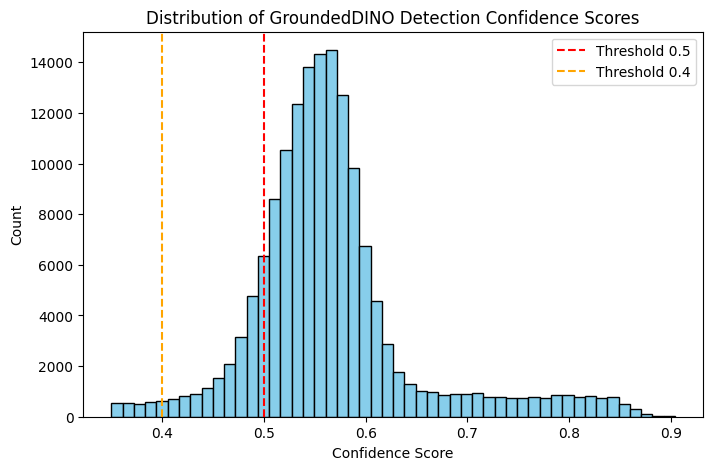

In [3]:
def count_hq_detections(hq):
    # If hq is a dict with experiments
    if isinstance(hq, dict):
        return sum(
            len(dets)
            for exp in hq.values()
            if isinstance(exp, dict) and 'filtered' in exp
            for dets in exp['filtered'].values()
        )
    # If hq is a list of detections
    elif isinstance(hq, list):
        return len(hq)
    else:
        return 0

print(f"Detections with threshold 0.5: {count_hq_detections(hq_default)}")
print(f"Detections with threshold 0.4: {count_hq_detections(hq_04)}")


# Collect all confidence scores from raw annotations
confidences = []
for img_id in image_ids:
    anns = gdino_ann.get_annotations_for_image(img_id)
    for ann in anns:
        for det in ann.get('detections', []):
            conf = det.get('confidence', None)
            if conf is not None:
                confidences.append(conf)

confidences = np.array(confidences)
print(f"Total detections: {len(confidences)}")

# Plot histogram of confidence scores
plt.figure(figsize=(8,5))
plt.hist(confidences, bins=50, color='skyblue', edgecolor='black')
plt.axvline(0.5, color='red', linestyle='--', label='Threshold 0.5')
plt.axvline(0.4, color='orange', linestyle='--', label='Threshold 0.4')
plt.xlabel('Confidence Score')
plt.ylabel('Count')
plt.title('Distribution of GroundedDINO Detection Confidence Scores (Finetuned)')
plt.legend()
plt.show()

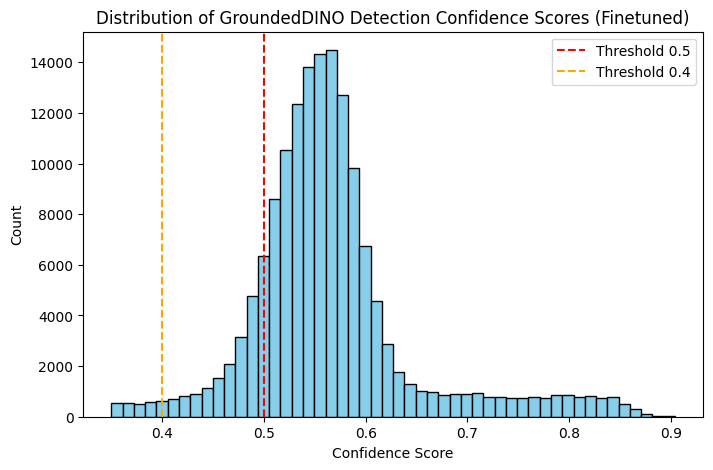

In [5]:

# Plot histogram of confidence scores
plt.figure(figsize=(8,5))
plt.hist(confidences, bins=50, color='skyblue', edgecolor='black')
plt.axvline(0.5, color='red', linestyle='--', label='Threshold 0.5')
plt.axvline(0.4, color='orange', linestyle='--', label='Threshold 0.4')
plt.xlabel('Confidence Score')
plt.ylabel('Count')
plt.title('Distribution of GroundedDINO Detection Confidence Scores (Finetuned)')
plt.legend()
plt.show()

In [9]:
import random

# Find image_ids with at least one detection with confidence < 0.35
low_conf_image_ids = []
for img_id in image_ids:
    anns = gdino_ann.get_annotations_for_image(img_id)
    for ann in anns:
        for det in ann.get('detections', []):
            if det.get('confidence', 1.0) < 0.4:
                print(f"Image ID {img_id} has low confidence detection: {det['confidence']}")
                low_conf_image_ids.append(img_id)
                break  # Only need one per image
        else:
            continue
        break

# Get 3 random image_ids (if available)
random_ids = random.sample(low_conf_image_ids, min(3, len(low_conf_image_ids)))
print("Random image_ids with confidence < 0.35:", random_ids)

Image ID 20230525_B10_0002 has low confidence detection: 0.3940505385398865
Image ID 20230525_A12_0041 has low confidence detection: 0.3627794682979584
Image ID 20230525_A12_0044 has low confidence detection: 0.38396576046943665
Image ID 20230525_A12_0050 has low confidence detection: 0.3949224650859833
Image ID 20230525_A12_0038 has low confidence detection: 0.3988194763660431
Image ID 20230525_C01_0048 has low confidence detection: 0.3665391206741333
Image ID 20230525_B11_0049 has low confidence detection: 0.3711118996143341
Image ID 20230525_H11_0043 has low confidence detection: 0.3715330958366394
Image ID 20230525_B03_0019 has low confidence detection: 0.3904303014278412
Image ID 20230525_B03_0060 has low confidence detection: 0.3633466064929962
Image ID 20230525_G09_0020 has low confidence detection: 0.39855828881263733
Image ID 20230525_G09_0021 has low confidence detection: 0.38280540704727173
Image ID 20230525_B08_0060 has low confidence detection: 0.3931240439414978
Image ID 

In [ ]:
20230525_A04, 20250624_chem02_35C_T00_1216_B06 , 20250305_G04, 20250305_G03

In [7]:
low_conf_image_ids

[]

Total annotated images (base): 152755
Detections with threshold 0.5 (base): 0
Detections with threshold 0.4 (base): 0
Total detections (base): 235557


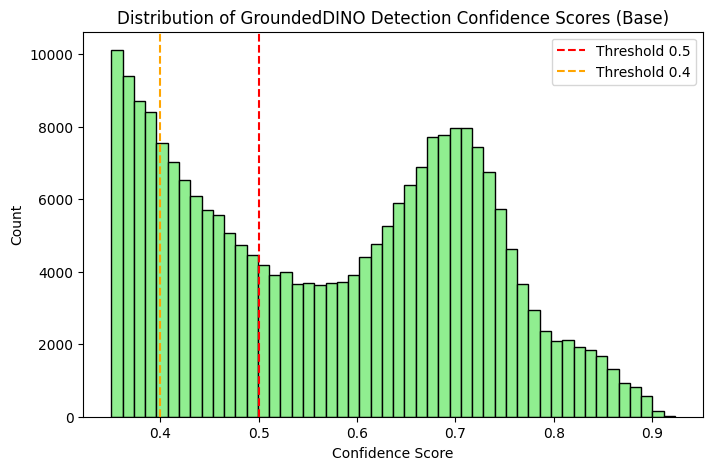

In [4]:
# Repeat the analysis for the base annotation file
base_ann_path = '/net/trapnell/vol1/home/mdcolon/proj/morphseq/segmentation_sandbox/data/annotation_and_masks/gdino_annotations/gdino_annotations.json'

# Load annotation manager
base_gdino_ann = GroundedDinoAnnotations(base_ann_path, verbose=False)

# Get all image IDs
base_image_ids = base_gdino_ann.get_all_image_ids()
print(f'Total annotated images (base): {len(base_image_ids)}')

# Generate high-quality annotations with default threshold (0.5)
base_hq_default = base_gdino_ann.get_or_generate_high_quality_annotations(base_image_ids, prompt='individual embryo', confidence_threshold=0.5, iou_threshold=0.5, save_to_self=False)

# Generate high-quality annotations with threshold 0.4
base_hq_04 = base_gdino_ann.get_or_generate_high_quality_annotations(base_image_ids, prompt='individual embryo', confidence_threshold=0.4, iou_threshold=0.5, save_to_self=False)

print(f"Detections with threshold 0.5 (base): {count_hq_detections(base_hq_default)}")
print(f"Detections with threshold 0.4 (base): {count_hq_detections(base_hq_04)}")

# Collect all confidence scores from raw annotations
base_confidences = []
for img_id in base_image_ids:
    anns = base_gdino_ann.get_annotations_for_image(img_id)
    for ann in anns:
        for det in ann.get('detections', []):
            conf = det.get('confidence', None)
            if conf is not None:
                base_confidences.append(conf)

base_confidences = np.array(base_confidences)
print(f"Total detections (base): {len(base_confidences)}")

# Plot histogram of confidence scores for base annotations
plt.figure(figsize=(8,5))
plt.hist(base_confidences, bins=50, color='lightgreen', edgecolor='black')
plt.axvline(0.5, color='red', linestyle='--', label='Threshold 0.5')
plt.axvline(0.4, color='orange', linestyle='--', label='Threshold 0.4')
plt.xlabel('Confidence Score')
plt.ylabel('Count')
plt.title('Distribution of GroundedDINO Detection Confidence Scores (Base)')
plt.legend()
plt.show()

In [ ]:
import pandas as pd
from collections import Counter
from scripts.utils.grounded_sam_utils import GroundedDinoAnnotations

# Config
ANNOTATIONS_JSON = '/net/trapnell/vol1/home/mdcolon/proj/morphseq/segmentation_sandbox/data/annotation_and_masks/gdino_annotations/gdino_annotations_finetuned.json'
PROMPT = 'individual embryo'
THRESHOLDS = [
    (0.50, 0.50),  # (confidence, iou)
    (0.45, 0.50),
]
OUTPUT_CSV = '/net/trapnell/vol1/home/mdcolon/proj/morphseq/segmentation_sandbox/data/annotation_and_masks/gdino_annotations/video_mode_changes.csv'

def get_hq_detection_count(hq, img_id):
    """
    Return the number of HQ detections for `img_id`, handling both:
    1) {experiment_id: {'filtered': {image_id: [det, …]}}}
    2) {image_id: [det, …]}
    """
    if not hq:
        return 0

    # Case 1 – experiment wrapper
    first_val = next(iter(hq.values()))
    if isinstance(first_val, dict) and "filtered" in first_val:
        total = 0
        for exp_block in hq.values():
            total += len(exp_block["filtered"].get(img_id, []))
        return total

    # Case 2 – direct image map
    if img_id in hq:
        return len(hq[img_id])

    return 0

# Load annotations
gdino = GroundedDinoAnnotations(ANNOTATIONS_JSON, verbose=False)

# Build map: video_id -> sorted list of image_ids
all_ids = gdino.get_all_image_ids()
video_map = {}
for img_id in all_ids:
    parts = img_id.split("_")
    vid = "_".join(parts[:2]) if len(parts) > 1 else img_id
    video_map.setdefault(vid, []).append(img_id)
for vid in video_map:
    video_map[vid].sort()

results = []

# Iterate each video
for vid, img_ids in sorted(video_map.items()):
    # print(f"Processing video {vid} with {len(img_ids)} images...")
    n = len(img_ids)
    if n == 0:
        continue
    sample_n = max(1, int(n * 0.2))
    sample_ids = img_ids[:sample_n]
    print(sample_ids)

    # Generate HQ dict for each threshold
    modes = {}
    for conf, iou in THRESHOLDS:
        key = f"{conf:.2f}_{iou:.2f}"
        hq = gdino.get_or_generate_high_quality_annotations(
            sample_ids,
            prompt=PROMPT,
            confidence_threshold=conf,
            iou_threshold=iou,
            save_to_self=False
        )
        counts = [ get_hq_detection_count(hq, img) for img in sample_ids ]
        mode = Counter(counts).most_common(1)[0][0] if counts else None
        # print(f"Mode for {key} in video {vid}: {mode}")
        modes[key] = mode

    # Compare modes
    keys = list(modes.keys())
    if modes[keys[0]] != modes[keys[1]]:
        results.append({
            "video_id": vid,
            f"mode_{keys[0]}": modes[keys[0]],
            f"mode_{keys[1]}": modes[keys[1]],
        })

# Save to CSV
df = pd.DataFrame(results)
df.to_csv(OUTPUT_CSV, index=False)
print(f"✅ Saved {len(results)} differing videos to {OUTPUT_CSV}")

['20230525_A03_0001', '20230525_A03_0002', '20230525_A03_0003', '20230525_A03_0004', '20230525_A03_0005', '20230525_A03_0006', '20230525_A03_0007', '20230525_A03_0008', '20230525_A03_0009', '20230525_A03_0010', '20230525_A03_0011', '20230525_A03_0012']
Mode for 0.50_0.50 in video 20230525_A03: 1
Mode for 0.45_0.50 in video 20230525_A03: 1
['20230525_A04_0001', '20230525_A04_0002', '20230525_A04_0003', '20230525_A04_0004', '20230525_A04_0005', '20230525_A04_0006', '20230525_A04_0007', '20230525_A04_0008', '20230525_A04_0009', '20230525_A04_0010', '20230525_A04_0011', '20230525_A04_0012']
Mode for 0.50_0.50 in video 20230525_A04: 1
Mode for 0.45_0.50 in video 20230525_A04: 1
['20230525_A05_0001', '20230525_A05_0002', '20230525_A05_0003', '20230525_A05_0004', '20230525_A05_0005', '20230525_A05_0006', '20230525_A05_0007', '20230525_A05_0008', '20230525_A05_0009', '20230525_A05_0010', '20230525_A05_0011', '20230525_A05_0012']
Mode for 0.50_0.50 in video 20230525_A05: 1
Mode for 0.45_0.50 in

In [20]:
# Generate and save high-quality annotations for all images at threshold 0.45
hq_result = gdino_ann.generate_high_quality_annotations(
    image_ids=gdino_ann.get_all_image_ids(),
    prompt='individual embryo',
    confidence_threshold=0.45,
    iou_threshold=0.5,
    overwrite=True,
    save_to_self=True
)
gdino_ann.save()
print("✅ High-quality annotations (0.45) saved to annotation file.")

✅ High-quality annotations (0.45) saved to annotation file.


Unique labels in mask: [0 1 2]


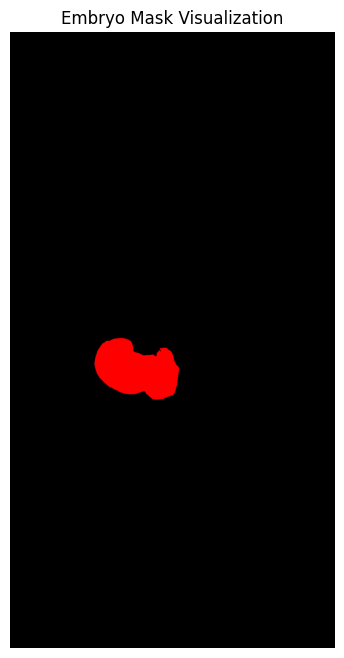

In [21]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Path to your mask file
mask_path = "/net/trapnell/vol1/home/mdcolon/proj/morphseq/segmentation_sandbox/data/annotation_and_masks/jpg_masks/20240404/masks/20240404_E05_0011_masks_emnum_1.jpg"

# Load mask as grayscale
mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)

# Print unique pixel values (labels)
unique_labels = np.unique(mask)
print("Unique labels in mask:", unique_labels)

# Create a color map for visualization
# 0 = background (black), 1 = embryo 1 (red), 2 = embryo 2 (green), etc.
colors = np.array([
    [0, 0, 0],      # background
    [255, 0, 0],    # embryo 1 (red)
    [0, 255, 0],    # embryo 2 (green)
    [0, 0, 255],    # embryo 3 (blue)
    [255, 255, 0],  # embryo 4 (yellow)
    [255, 0, 255],  # embryo 5 (magenta)
    [0, 255, 255],  # embryo 6 (cyan)
    [255, 255, 255] # embryo 7 (white)
], dtype=np.uint8)

# Map mask labels to colors
color_mask = colors[mask]

# Show the mask
plt.figure(figsize=(8, 8))
plt.title("Embryo Mask Visualization")
plt.imshow(color_mask)
plt.axis('off')
plt.show()


In [22]:
mask get counts of pixels for the values in the image 

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [23]:
labels, counts = np.unique(mask, return_counts=True)
for label, count in zip(labels, counts):
    print(f"Label {label}: {count} pixels")

Label 0: 2476199 pixels
Label 1: 45514 pixels
Label 2: 15 pixels
